<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import re

In [23]:
df_analyst = pd.read_csv('Analyst.csv')
df_de = pd.read_csv('DE.csv')
df_ds = pd.read_csv('DS.csv')

In [24]:
print('df_analyst', len(df_analyst))
print('df_de', len(df_de))
print('df_ds', len(df_ds))

df_analyst 1000
df_de 702
df_ds 410


In [93]:
df = pd.concat([df_analyst, df_de, df_ds], sort=True)

In [94]:
print('df', len(df))

df 2112


In [95]:
df.drop_duplicates(subset = 'id', keep = 'first', inplace = True)
print('df', len(df))

df 1835


In [103]:
def upper_name(x):
    return x.upper()

def json_from(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return str(x['from'])

def json_to(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['to']

def df_type(x):
    return type(x)

def json_currency(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['currency']

def requirement(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['requirement']

def responsibility(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['responsibility']

def name(x):
    x = x.lower()
    if 'analyst' in x or 'аналитик' in x:
        return 'analyst'
    elif 'engineer' in x:
        return 'engineer'
    elif 'scientist' in x:
        return 'scientist'
    elif 'developer' in x:
        return 'developer'
    return None

def name_Analyst(x):
    x = x.lower()
    if 'analyst' in x or 'аналитик' in x:
        return 1
    return 0

def name_Engineer(x):
    x = x.lower()
    if 'engineer' in x:
        return 1
    return 0

def name_Scientist(x):
    x = x.lower()
    if 'scientist' in x:
        return 1
    return 0

def name_Developer(x):
    x = x.lower()
    if 'developer' in x:
        return 1
    return 0    

def re_pd(x):
    x = re.sub('(.)*(С|с|C|c)истемный (а|a)налитик(.)*', 'Cистемный аналитик', x)
    x = re.sub('^System Analyst(.)*', 'Cистемный аналитик', x)
    
    x = re.sub('(.)*(B|b)usiness(-|\s)? (A|a)nalyst(.)*', 'Бизнес аналитик', x)
    x = re.sub('(.)*(Б|б)изнес(-|\s)?(А|а)налитик(.)*', 'Бизнес аналитик', x)
    
    x = re.sub('^Аналитик$', 'Data Analyst', x)
    x = re.sub('(.)*Старший аналитик(.)*', 'Data Analyst', x)
    x = re.sub('^Ведущий аналитик$', 'Data Analyst', x)
    x = re.sub('(.)*Data Analyst(.)*', 'Data Analyst', x)
    x = re.sub('(.)*Аналитик данных(.)*', 'Data Analyst', x)
    x = re.sub('^Аналитик BI(.)*', 'Data Analyst', x)
    x = re.sub('^Аналитик DWH(.)*', 'Data Analyst', x)
    x = re.sub('^Analyst$', 'Data Analyst', x)
    x = re.sub('^Аналитик, IT Analyst$', 'Data Analyst', x)
    
    x = re.sub('(.)*Product Analyst(.)*', 'Продуктовый аналитик', x)
    
    x = re.sub('(.)*Data engineer(.)*', 'Data Engineer', x)
    x = re.sub('(.)*Data Engineer(.)*', 'Data Engineer', x)
    
    x = re.sub('(.)*Automation Engineer(.)*', 'Тестировщик ПО', x)
    x = re.sub('(.)*Тестировщик ПО(.)*', 'Тестировщик ПО', x)
    
    x = re.sub('(.)*Python Developer(.)*', 'Python Developer', x)
    x = re.sub('(.)*Data scientist(.)*', 'Data Scientist', x)
    x = re.sub('(.)*Data Scientist(.)*', 'Data Scientist', x)
    x = re.sub('(.)*Dev(\s)?Ops(.)*', 'DevOps инженер', x)
    x = re.sub('(.)*Web-аналитик(.)*', 'Web Analyst', x)
    return x

In [414]:
# df_new['alternate_url'] = df['alternate_url']
# df_new['from'] = df['salary'].apply(json_from)
# df_new['to'] = df['salary'].apply(json_to)
# df_new['currency'] = df['salary'].apply(json_currency)
# df_new['requirement'] = df['snippet'].apply(requirement)
# df_new['responsibility'] = df['snippet'].apply(responsibility)
df['Analyst'] = df['name'].apply(name_Analyst)
df['Engineer'] = df['name'].apply(name_Engineer)
df['Scientist'] = df['name'].apply(name_Scientist)
df['Developer'] = df['name'].apply(name_Developer)

df['name_new'] = df['name'].apply(re_pd)
df['name_upper'] = df['name_new'].apply(upper_name)
df['name_short'] = df['name_upper'].apply(name)

In [418]:
n =  df.groupby(['name_new']).count().sort_values('name_short', ascending=False).index
# df[df['name_new'].isin(n)]['name_new'].value_counts()
df['name_new'].value_counts().head(10)

Cистемный аналитик         238
Data Analyst               205
Бизнес аналитик            204
Data Engineer              138
Data Scientist              54
DevOps инженер              50
Продуктовый аналитик        43
Python Developer            35
Тестировщик ПО              27
Cloud Engineer (Europe)     12
Name: name_new, dtype: int64

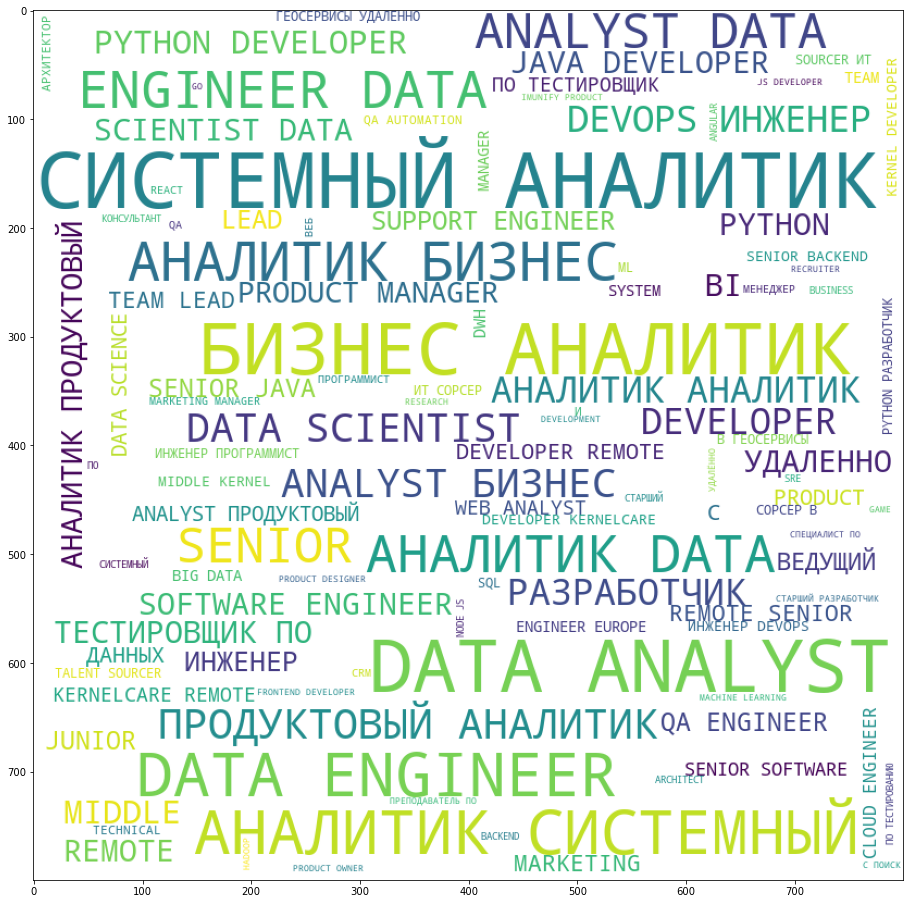

In [422]:
from collections import Counter

vacancy_names = df['name_upper'] # change here to change source of data/words etc
cloud = Counter(vacancy_names)
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
cloud = ''
for x in list(vacancy_names):
    cloud += x + ' '
wordcloud = WordCloud(width = 800, height = 800, 

                stopwords = stopwords, 
                min_font_size = 8,background_color='white'
                     ).generate(cloud)

import matplotlib.pylab as plt
plt.figure(figsize = (16, 16)) 
plt.imshow(wordcloud)
plt.savefig('svod.png')

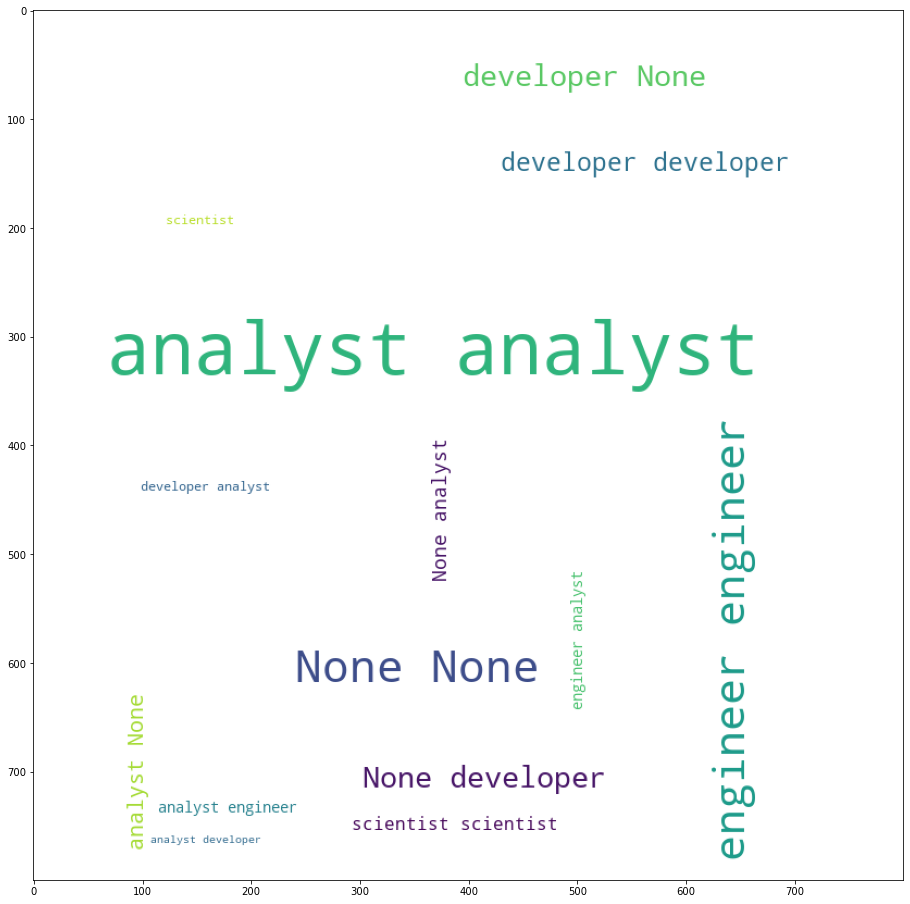

In [423]:
vacancy_names = df['name_short'] # change here to change source of data/words etc
cloud = Counter(vacancy_names)
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
cloud = ''
for x in list(vacancy_names):
    cloud += str(x) + ' '
wordcloud = WordCloud(width = 800, height = 800, 

                stopwords = stopwords, 
                min_font_size = 8,background_color='white'
                     ).generate(cloud)

import matplotlib.pylab as plt
plt.figure(figsize = (16, 16)) 
plt.imshow(wordcloud)
plt.savefig('svod_short.png')

In [424]:
analitic = list(df.groupby(['name']).count().sort_values('name_short', ascending=False).head().index)
df.groupby(['name']).count().sort_values('name_short', ascending=False).head()
analitic

['Системный аналитик',
 'Бизнес-аналитик',
 'Аналитик',
 'Data Engineer',
 'Ведущий системный аналитик']

In [411]:
list(df.columns.values)

['Unnamed: 0',
 'accept_temporary',
 'address',
 'alternate_url',
 'apply_alternate_url',
 'archived',
 'area',
 'contacts',
 'created_at',
 'department',
 'employer',
 'has_test',
 'id',
 'insider_interview',
 'name',
 'premium',
 'published_at',
 'relations',
 'response_letter_required',
 'response_url',
 'salary',
 'schedule',
 'snippet',
 'sort_point_distance',
 'type',
 'url',
 'working_days',
 'working_time_intervals',
 'working_time_modes',
 'name_upper',
 'name_short',
 'Analyst',
 'Engineer',
 'Scientist',
 'Developer',
 'name_new']